# 단어별 빈도수 생성

In [1]:
from konlpy.tag import Okt
from konlpy.utils import pprint

okt = Okt()

# 단어별 빈도수 출력 함수
def nounList(lines):
    nouns = []
    cnt = []
    text = []
    
    # 명사 list 추출 (x축, nouns)
    for line in lines:
        text = okt.nouns(u'%s' % line)
        for wd in text:
            if wd not in nouns: # 중복 방지 코드
                nouns.append(wd)
                
    # 명사별 빈도수 계산 (y축, cnt)
    for noun in nouns:
        wordcount = 0
        for line in lines:
            text = okt.nouns(u'%s' % line)
            wordcount += text.count(noun)
        cnt.append(wordcount)
    
    # 빈도별 내림차순 정렬
    table = dict(zip(nouns, cnt))
    table = sorted(table.items(), key=lambda x: x[1], reverse=True)
    table = dict(table)
    
    return table

## 파일입력

In [3]:
txt = open('./lyrics.txt', encoding='utf-8')
txt = txt.readlines()

# print(nounList(txt))

# 단어별 빈도 막대그래프

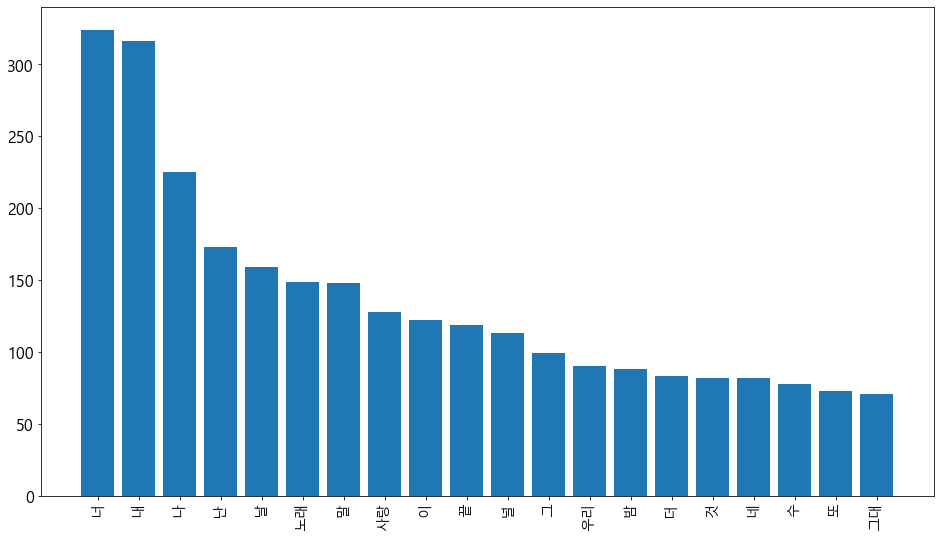

In [4]:
# matplotlib 한글설정
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 시각화용 aes 설정
x = list(nounList(txt).keys())[:20]
y = list(nounList(txt).values())[:20]

# 시각화
plt.figure(figsize = (16, 9))
plt.bar(x, y)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=16)
plt.show()

# 워드클라우드 (추후 모양선택은 회의를 거쳐서...)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# 난수 고정
random.seed(1234)

# Generate a word cloud image
wc = WordCloud(font_path='font/NanumGothic.ttf',
              background_color='white',
              width = 1000,
              height = 1000,
              max_words = 100,
              max_font_size = 300)

wc.generate_from_frequencies(nounList(txt))

fig = plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()
fig.savefig('wordcloud.png')

# 남은 것...
- 불용어 제거 및 추가 작업 찾아보기
- 명사 이외에 형용사, 부사도 포함할지?
- Dynamite가 영어 가사인데 이건 반영안됨...
- 긍정어, 부정어 별로 만들지?
- 가사를 음원사이트별로 크롤링하여 하나의 txt파일로 만들 것
- 워드 클라우드의 모양을 선택해서 고를 것